In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
sample_submit_df = pd.read_csv('./data/sample_submit.csv')

In [3]:
train_df.head()

,id,age,sex,bmi,children,smoker,region,charges
0,0,26,male,32.665465,3,no,southeast,0
1,1,41,male,29.798725,1,no,southwest,0
2,2,28,male,32.722029,0,yes,northwest,1
3,3,20,female,38.429831,2,no,southeast,0
4,4,45,female,29.641854,1,no,northwest,0


In [4]:
train_df.columns

Index(['id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
train_df.isnull().sum()

id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
train_df['region'].value_counts()

northeast    414
southeast    408
northwest    403
southwest    375
Name: region, dtype: int64

In [7]:
train_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].describe()

,age,bmi,children,charges
count,1600.000000,1600.000000,1600.000000,1600.000000
mean,38.985000,32.424376,1.014375,0.306250
std,13.555012,5.766915,1.259031,0.628656
min,18.000000,20.627626,0.000000,0.000000
25%,27.000000,28.634267,0.000000,0.000000
50%,40.000000,32.268786,1.000000,0.000000
75%,50.000000,37.069581,2.000000,0.000000
max,64.000000,47.290644,5.000000,2.000000


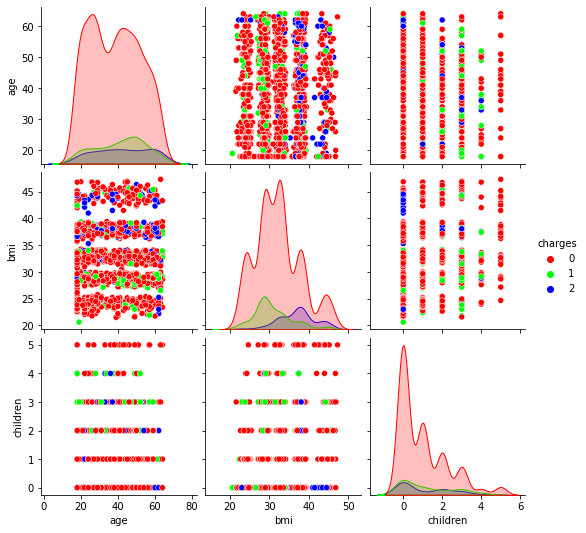

In [8]:
sns.pairplot(train_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']], hue='charges', 
             palette={0: 'red', 1: '#00ff00', 2: 'blue'})

In [4]:
train_df = pd.get_dummies(train_df)

In [5]:
train_df.head()

,id,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,26,32.665465,3,0,0,1,1,0,0,0,1,0
1,1,41,29.798725,1,0,0,1,1,0,0,0,0,1
2,2,28,32.722029,0,1,0,1,0,1,0,1,0,0
3,3,20,38.429831,2,0,1,0,1,0,0,0,1,0
4,4,45,29.641854,1,0,1,0,1,0,0,1,0,0


In [6]:
train_df.columns

Index(['id', 'age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [7]:
X = train_df[['age', 'sex_female', 'bmi', 'children', 'smoker_yes',  'region_northeast', 'region_northwest','region_southeast']].values
y = train_df['charges'].values

In [8]:
X.shape

(1600, 8)

# RF

In [9]:
import pandas as pd
import matplotlib.pyplot as pyplot
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import seaborn

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [11]:
forest = RandomForestClassifier(n_estimators = 100, random_state=0)

forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [12]:

print(f1_score(y_test, forest.predict(X_test),average=None))
print(f1_score(y_test, forest.predict(X_test),average='micro'))
print(f1_score(y_test, forest.predict(X_test),average='macro'))
print(f1_score(y_test, forest.predict(X_test),average='weighted'))

[0.94163424 0.44067797 0.74626866]
0.875
0.7095269546877497
0.8677284331163546


In [13]:
print('Train score: {}'.format(forest.score(X_train, y_train)))
print('Test score: {}'.format(forest.score(X_test, y_test)))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, forest.predict(X_test))))
print('f1 score: {:.3f}'.format(f1_score(y_test, forest.predict(X_test),average='macro')))


Train score: 1.0
Test score: 0.875
Confusion matrix:
[[242   6   1]
 [ 17  13   2]
 [  6   8  25]]
f1 score: 0.710


In [14]:
forest_grid_param = {
    'n_estimators': [10, 50, 100],
    'max_features': [1, 'auto', None],
    'max_depth': [1, 5, 10, None],
    'min_samples_leaf': [1, 2, 4,]
}

In [24]:

# スコア方法をF1に設定
def f1score(y_train: np.array, y_pred: np.array):
    score = f1_score(y_test, clf.predict(X_test),average='macro')
    return score


f1_scoring = make_scorer(f1score, greater_is_better=True)
#,  pos_label=1  'accuracy'

In [25]:
#?GridSearchCV

In [26]:
# グリッドサーチで学習
forest_grid_search = GridSearchCV(RandomForestClassifier(random_state=0, n_jobs=-1), forest_grid_param, scoring=f1_scoring, cv=4)
forest_grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'max_depth': [1, 5, 10, None],
                         'max_features': [1, 'auto', None],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [10, 50, 100]},
             scoring=make_scorer(f1score))

In [27]:
# 結果
print('Best parameters: {}'.format(forest_grid_search.best_params_))
print('Best score: {:.3f}'.format(forest_grid_search.best_score_))

Best parameters: {'max_depth': 1, 'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 10}
Best score: 0.745


In [28]:
clf = forest_grid_search.best_estimator_
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, max_features=1, n_estimators=10, n_jobs=-1,
                       random_state=0)

In [29]:
print('Train score: {}'.format(clf.score(X_train, y_train)))
print('Test score: {}'.format(clf.score(X_test, y_test)))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, clf.predict(X_test))))
print('f1 score: {:.3f}'.format(f1_score(y_test, clf.predict(X_test),average='macro')))

Train score: 0.78671875
Test score: 0.778125
Confusion matrix:
[[249   0   0]
 [ 32   0   0]
 [ 39   0   0]]
f1 score: 0.292


# 主成分分析

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scalered = scaler.transform(X)
pd.DataFrame(X_scalered)

In [ ]:
from sklearn.decomposition import PCA
PCA = PCA()

PCA.fit(X_scalered)
X_pac = PCA.transform(X_scalered)

plt.scatter(X_pac[:,0],X_pac[:,1])
plt.show()

In [ ]:
PCA.explained_variance_ratio_

In [ ]:
np.cumsum(PCA.explained_variance_ratio_)

In [ ]:
type(X)

In [ ]:
type(X_pac)

In [ ]:
X = X_pac[:,:3]
X.shape

# 学習(勾配ブースティング)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, max_leaf_nodes=3, min_samples_leaf=10)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_leaf_nodes=3,
                          min_samples_leaf=10, n_estimators=1000)

In [28]:
pred_train, pred_test = gbr.predict(X_train), gbr.predict(X_test)

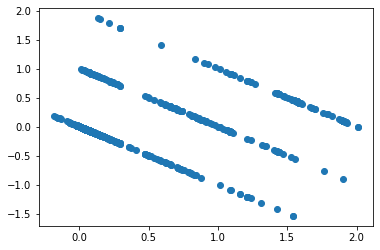

In [29]:
import matplotlib.pyplot as plt

error_train = y_train - pred_train

plt.scatter(pred_train, error_train)
plt.show()

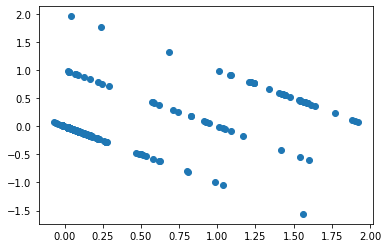

In [30]:
import matplotlib.pyplot as plt

error_test = y_test - pred_test

plt.scatter(pred_test, error_test)
plt.show()

In [34]:
f1_score(y_test, pred_test, average='macro')

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [31]:
from sklearn.metrics import f1_score

f1_score(y_train, pred_train)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
#from lightgbm import LGMRegressor
#nbr = LGBMRegressor(learning_rate = 0.01, n_eatimators=1000, num_leaves=4, min_child_samples=10)

#nbr.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=5, verbose=50)